In [21]:
from segment import segment_scalp
import matplotlib.pyplot as plt
import cv2
import numpy as np

input_path = "../../hair_pictures/2.webp"


segmented, mask = segment_scalp(input_path)


In [12]:
segmented.show()

AttributeError: 'numpy.ndarray' object has no attribute 'show'

(np.float64(-0.5), np.float64(2543.5), np.float64(3391.5), np.float64(-0.5))

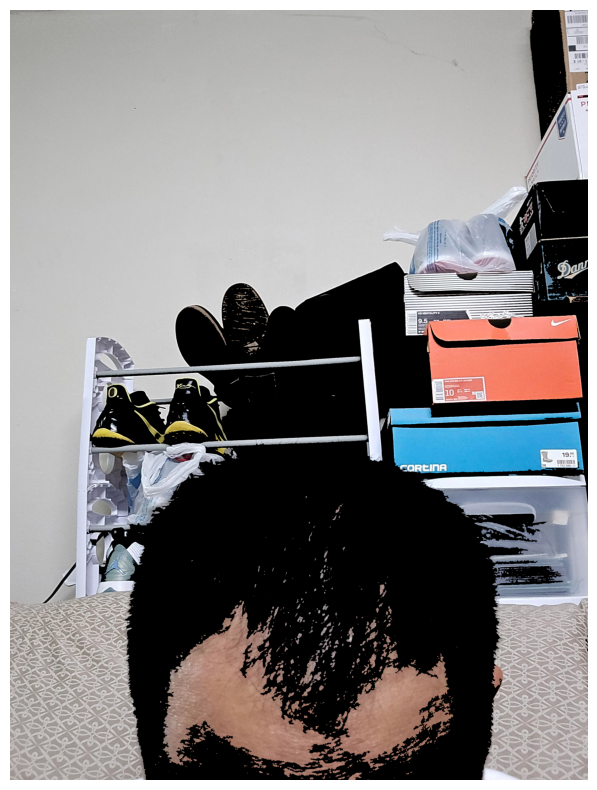

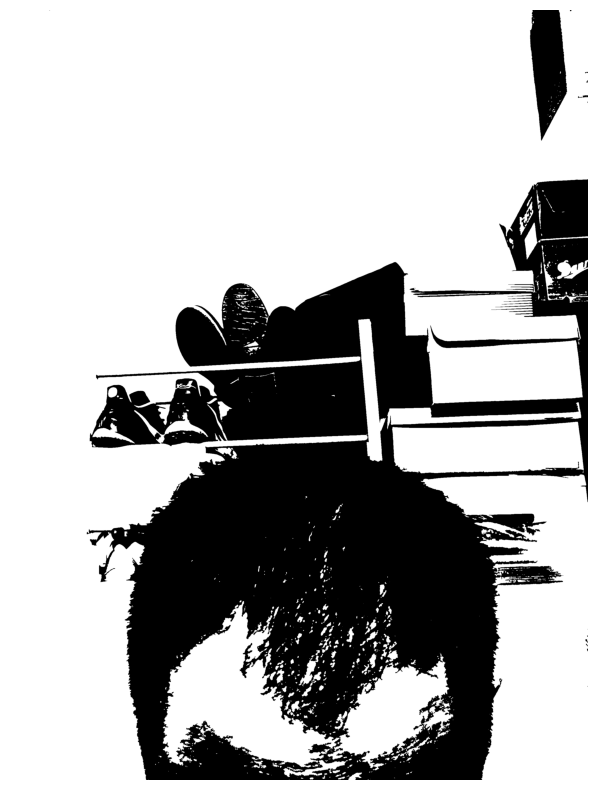

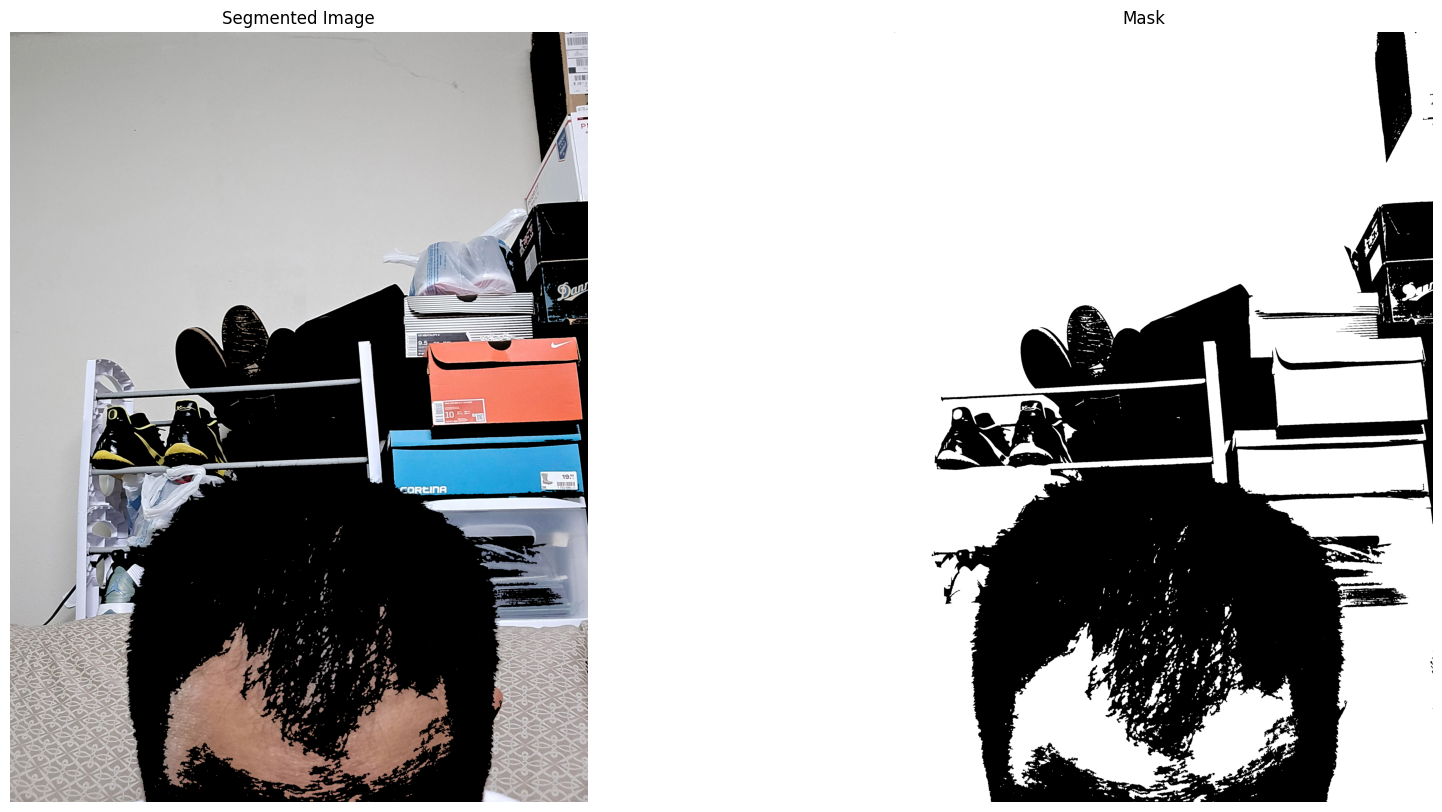

In [15]:

# Display segmented image
plt.figure(figsize=(10, 10))
plt.imshow(segmented)
plt.axis('off')
# plt.show()

# Display mask
plt.figure(figsize=(10, 10))
plt.imshow(mask, cmap='gray')  # Use grayscale colormap for the mask
plt.axis('off')
# plt.show()

# If you want to display them side by side:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(segmented)
ax1.set_title('Segmented Image')
ax1.axis('off')
ax2.imshow(mask, cmap='gray')
ax2.set_title('Mask')
ax2.axis('off')
# plt.show()

In [22]:

# Read the image
image = cv2.imread(input_path)

# Create an initial mask
mask = np.zeros(image.shape[:2], np.uint8)

# Define a rectangle for GrabCut (x, y, width, height)
rect = (50, 50, 450, 290)

# Apply GrabCut
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)
cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask to extract the head and scalp area
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Get the final segmented image
segmented = image * mask2[:, :, np.newaxis]

# Display the result
cv2.imshow("Segmented", segmented)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [27]:
import tensorflow as tf
import numpy as np
from pathlib import Path

import cv2

# Load the pre-trained DeepLabV3+ model
model = tf.keras.applications.DenseNet201(weights="imagenet")

# Load an image
image_path = Path("..")/ '..' / "hair_pictures" / "2.jpeg"
image = cv2.imread(image_path)
image_resized = cv2.resize(image, (224, 224))  # Resize image for model

# Pre-process the image (normalization)
image_array = np.expand_dims(image_resized, axis=0)
image_array = tf.keras.applications.densenet.preprocess_input(image_array)

# Predict segmentation mask
predictions = model.predict(image_array)
# (Post-processing may be necessary to extract scalp or head segmentation from the output)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [31]:
from tensorflow.keras.applications.densenet import decode_predictions
decoded_preds = decode_predictions(predictions, top=1000)[0]  # Get all predictions

# Filter predictions above 50% threshold
threshold = 0.5  # 50%
high_confidence_preds = [(label, score) for (_, label, score) in decoded_preds if score > threshold]

if high_confidence_preds:
    # Display the image and predictions
    plt.figure(figsize=(15, 5))
    
    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
    plt.title('Input Image')
    plt.axis('off')
    
    # Predictions above threshold
    plt.subplot(1, 2, 2)
    labels = [p[0] for p in high_confidence_preds]
    scores = [p[1] for p in high_confidence_preds]
    plt.barh(labels, scores)
    plt.title(f'Predictions Above {threshold*100}% Confidence')
    plt.xlabel('Probability')
    
    plt.tight_layout()
    plt.show()
    
    # Also print the values
    print(f"\nPredictions above {threshold*100}% confidence:")
    for label, score in high_confidence_preds:
        print(f"{label}: {score*100:.2f}%")

In [32]:
high_confidence_preds

[]

In [33]:
decode_predictions(predictions, top=1000)[0] 

[('n03417042', 'garbage_truck', np.float32(0.16037087)),
 ('n03876231', 'paintbrush', np.float32(0.14762184)),
 ('n03179701', 'desk', np.float32(0.10468985)),
 ('n03337140', 'file', np.float32(0.082419224)),
 ('n04004767', 'printer', np.float32(0.07491177)),
 ('n03924679', 'photocopier', np.float32(0.05902439)),
 ('n02971356', 'carton', np.float32(0.03895034)),
 ('n02871525', 'bookshop', np.float32(0.03711637)),
 ('n02727426', 'apiary', np.float32(0.020785877)),
 ('n03384352', 'forklift', np.float32(0.020358082)),
 ('n03661043', 'library', np.float32(0.017289603)),
 ('n03127925', 'crate', np.float32(0.010987268)),
 ('n03642806', 'laptop', np.float32(0.0105203325)),
 ('n03180011', 'desktop_computer', np.float32(0.010416143)),
 ('n03095699', 'container_ship', np.float32(0.0077061458)),
 ('n02870880', 'bookcase', np.float32(0.007618317)),
 ('n04200800', 'shoe_shop', np.float32(0.00747362)),
 ('n03782006', 'monitor', np.float32(0.0070660384)),
 ('n04152593', 'screen', np.float32(0.00676683